In [17]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [18]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [19]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max") 
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [28]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url) 
html_data = response.text  
soup = BeautifulSoup(html_data, 'html.parser') 
table = soup.find_all("tbody")[1]  
rows = table.find_all("tr")
dates = []
revenues = []
for row in rows:
    cols = row.find_all("td")
    if len(cols) == 2:  
        dates.append(cols[0].text.strip())
        revenues.append(cols[1].text.strip())
tesla_revenue = pd.DataFrame({
    "Date": dates,
    "Revenue": revenues
})
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
print(tesla_revenue.tail())

          Date Revenue
48  2010-09-30     $31
49  2010-06-30     $28
50  2010-03-31     $21
52  2009-09-30     $46
53  2009-06-30     $27


In [29]:
GME = yf.Ticker("GME")
gme_data = GME.history(period="max")
gme_data.reset_index(inplace=True)
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [36]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url) 
html_data_2 = response.text  
soup = BeautifulSoup(html_data_2, 'html.parser')
table = soup.find_all("table")[1] 
gme_revenue = pd.read_html(str(table))[0] 
gme_revenue.columns = ["Date", "Revenue"] 
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace({'\$': '', ',': ''}, regex=True)
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")
print(gme_revenue.tail())

          Date  Revenue
57  2006-01-31     1667
58  2005-10-31      534
59  2005-07-31      416
60  2005-04-30      475
61  2005-01-31      709


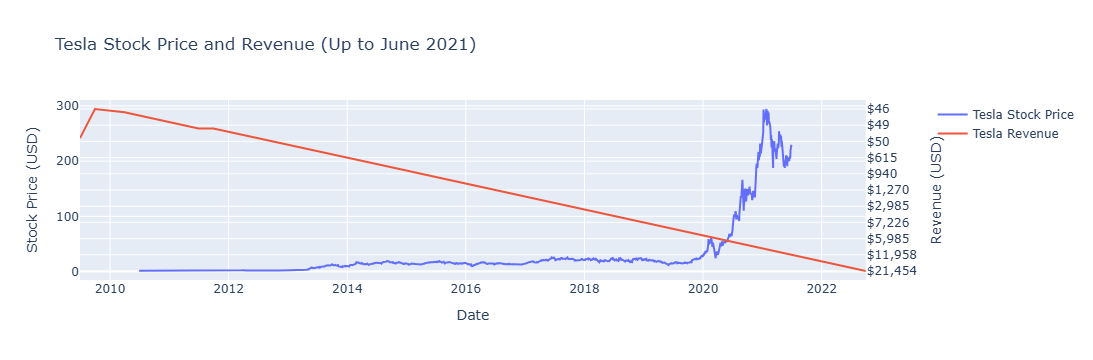

In [34]:
tesla_data_filtered = tesla_data[tesla_data['Date'] <= '2021-06-30']
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(x=tesla_data_filtered['Date'], y=tesla_data_filtered['Close'], name="Tesla Stock Price"),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter(x=tesla_revenue['Date'], y=tesla_revenue['Revenue'], name="Tesla Revenue"),
    secondary_y=True,
)
fig.update_layout(
    title_text="Tesla Stock Price and Revenue (Up to June 2021)"
)
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Stock Price (USD)", secondary_y=False)
fig.update_yaxes(title_text="Revenue (USD)", secondary_y=True)
fig.show()

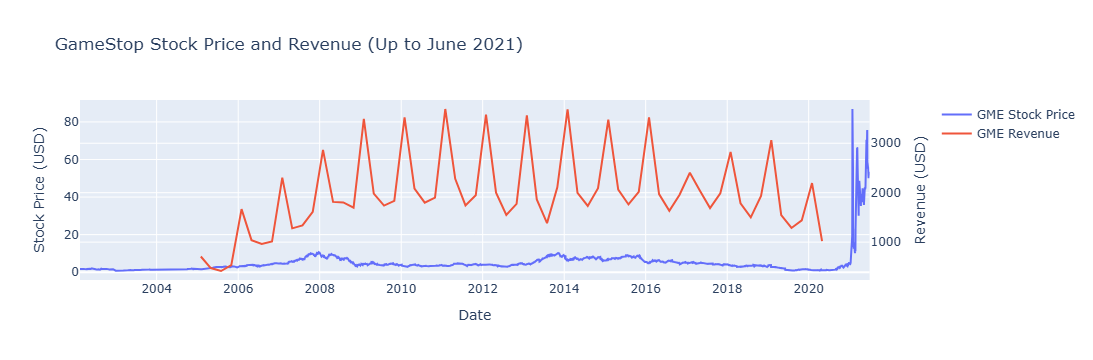

In [35]:
gme_data_filtered = gme_data[gme_data['Date'] <= '2021-06-30']
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(x=gme_data_filtered['Date'], y=gme_data_filtered['Close'], name="GME Stock Price"),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter(x=gme_revenue['Date'], y=gme_revenue['Revenue'], name="GME Revenue"),
    secondary_y=True,
)
fig.update_layout(
    title_text="GameStop Stock Price and Revenue (Up to June 2021)"
)
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Stock Price (USD)", secondary_y=False)
fig.update_yaxes(title_text="Revenue (USD)", secondary_y=True)
fig.show()